In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score,normalized_mutual_info_score,adjusted_rand_score
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data=pd.read_csv('raw_data.csv')
com=pd.read_csv('data.csv')
features=pd.read_csv('features.csv')

In [3]:
com

,EI,WI,EC,WC,EA,WA,AM,LC,MC,ND,...,N,O,Test-1,Test-2,Test-3,BXI,CXI,TXI,Composite,Final Label
0,4.0,1.0,3.0,1.0,0.0,0.0,5.00,1.75,5.00,0.0,...,36.0,28.0,40,52,46,132,126,100.0,32.399627,0
1,6.0,7.0,9.0,9.0,2.0,6.0,3.67,0.75,4.00,4.5,...,20.0,27.0,48,52,46,148,142,115.0,56.578743,1
2,3.0,0.0,6.0,8.0,0.0,1.0,3.00,0.50,4.00,4.0,...,21.0,26.0,42,54,48,138,132,103.0,39.904295,0
3,4.0,2.0,9.0,1.0,1.0,3.0,1.33,2.00,4.75,5.0,...,36.0,32.0,40,52,44,132,124,96.0,29.038282,0
4,5.0,0.0,5.0,1.0,1.0,1.0,2.00,1.75,4.75,3.5,...,27.0,34.0,42,48,44,132,128,99.0,32.784781,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,8.0,8.0,7.0,9.0,4.0,5.0,1.67,1.00,5.00,0.0,...,11.0,26.0,48,48,48,144,144,114.0,55.112045,1
4542,6.0,6.0,6.0,6.0,2.0,5.0,1.67,2.75,4.50,2.5,...,21.0,23.0,56,46,46,158,158,129.0,77.384843,2
4543,8.0,7.0,4.0,6.0,5.0,3.0,5.00,1.00,4.00,0.5,...,28.0,29.0,52,48,48,152,152,124.0,68.689698,1
4544,6.0,9.0,4.0,1.0,3.0,6.0,5.00,2.50,5.00,0.0,...,38.0,36.0,48,52,46,148,142,114.0,55.983505,1


In [3]:
mapping={
     'most people':3,
    'many people':2,
    'some people':1,
    'a few people':0,
    'one or two people':-1,
    'nobody':-2,
    'usually': 3,
    'often':2,
    'sometimes':1,
    'occasionally':0,
    'rarely':-1,
    'never':-2,
    'disagree':-2,
    'slightly disagree':-1,
    'neutral':0,
    'slightly agree':1,
    'agree':2
}

In [4]:
Y=[int(x) for x in list(com['Final Label'])]

In [5]:
mean=[]
for i in data.index:
    s=0
    c=0
    for column in data.columns[2:]:
        val=data[column][i]
        res = re.sub(' +', ' ',val)
        res=res.lower()
        res=''.join(c for c in res if (c.isalpha()or c==' '))
        res=res.strip()
        if(i>=54 and i<=73 and not pd.isna(val)):
            s=s+int(val)
            c=c+1
        elif(res in mapping):
            s=s+mapping[res]
            c=c+1
    if(c==0):
        print(data.loc[i])
    s=s/c
    mean.append(s)

In [6]:
def compute_features(df,feature_mapping):
    X=[]
    for column in df.columns[2:]:
        values=list(df[column])
        l=len(values)
        x=[]
        for i in range(l):
            value=values[i]
            res = re.sub(' +', ' ',value)
            res=res.lower()
            res=''.join(y for y in res if (y.isalpha()or y==' '))
            res=res.strip()
            if(i>=54 and i<=73 and not pd.isna(value)): 
                x.append(int(value))
            elif(res in feature_mapping):
                x.append(feature_mapping[res])
            else:
                x.append(mean[i])
        X.append(x)
    return np.array(X)

In [7]:
X=compute_features(data,mapping)

In [9]:
n_components=70
pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_train)
print("Support Vector Machines: ")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = svm_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_train)
print("Random Forest Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = random_forest_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_train)
print("Logistic Regression Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = logistic_regression_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_train)
print("Multi Layer Perceptron :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = mlp.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))

Support Vector Machines: 
Training accuracy: 0.8154485455878758
Testing accuracy: 0.8373626373626374
Random Forest Classifier :
Training accuracy: 1.0
Testing accuracy: 0.8351648351648352
Logistic Regression Classifier :
Training accuracy: 0.6890735761427523
Testing accuracy: 0.7076923076923077
Multi Layer Perceptron :
Training accuracy: 0.9992666829626008
Testing accuracy: 0.7362637362637363


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.1, random_state=42)
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_train)
print("Support Vector Machines: ")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = svm_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_train)
print("Random Forest Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = random_forest_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_train)
print("Logistic Regression Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = logistic_regression_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_train)
print("Multi Layer Perceptron :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = mlp.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))

Support Vector Machines: 
Training accuracy: 0.8225372769494012
Testing accuracy: 0.8307692307692308
Random Forest Classifier :
Training accuracy: 1.0
Testing accuracy: 0.810989010989011
Logistic Regression Classifier :
Training accuracy: 0.6885846981178196
Testing accuracy: 0.7186813186813187
Multi Layer Perceptron :
Training accuracy: 1.0
Testing accuracy: 0.778021978021978


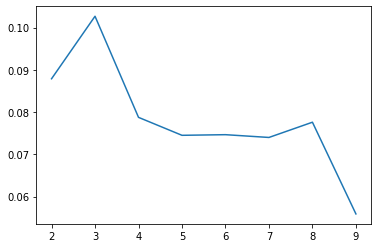

In [12]:
k_values=[]
scores=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    k_values.append(k)
    scores.append(silhouette_score(X, labels))
plt.plot(k_values,scores)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(X)
labels = kmeans.labels_

In [26]:
print(normalized_mutual_info_score(labels,Y))
print(adjusted_rand_score(labels,Y))

0.04902646667267822
0.02039778553528944


In [14]:
X.shape

(4546, 124)

In [15]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X_lda, Y, test_size=0.1, random_state=42)
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_train)
print("Support Vector Machines: ")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = svm_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_train)
print("Random Forest Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = random_forest_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_train)
print("Logistic Regression Classifier :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = logistic_regression_classifier.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_train)
print("Multi Layer Perceptron :")
print("Training accuracy: "+str(accuracy_score(y_train, y_pred)))
y_pred = mlp.predict(X_test)
print("Testing accuracy: "+str(accuracy_score(y_test, y_pred)))

Support Vector Machines: 
Training accuracy: 0.7008066487411391
Testing accuracy: 0.7538461538461538
Random Forest Classifier :
Training accuracy: 1.0
Testing accuracy: 0.7450549450549451
Logistic Regression Classifier :
Training accuracy: 0.6883402591053532
Testing accuracy: 0.734065934065934
Multi Layer Perceptron :
Training accuracy: 0.7210950867758494
Testing accuracy: 0.778021978021978


In [16]:
X_lda.shape

(4546, 2)